In [1]:
%load_ext autoreload
%autoreload 2

# **Trabajo Final Pinasco -Tags de HTML**

La empresa amplitude  trackea la información de un usuario cuando navega la web de Kavak, a traves de tags en los botones
 del html.Cada registro del datset es una sesión de un usuario que navega por la pagina web de Kavak.

el dataset se encuentra en [link](https://www.dropbox.com/s/u39wjhai7fnnxnq/navegacion_web.pq?dl=0)

# Glosario



**user_id**=id del usuario
**device_id**= id del dispositivo
**min_session_time** = fecha de la primera sesión
**total_sessions_prev**= numero de sesion
**total_previous_events**= cantidad de eventos en esta sesión
**date_short**= fecha
    **total_previous_vipphoto_selected**=filtro del auto(evento)
    **total_previous_catalogfilter_selected**= filtro del auto (evento)
    **total_previous_vip_viewed**=filtro del auto (evento)
    **total_previous_cataloglist_viewed**=filtro del auto (evento)
    **total_previous_year_selected**=filtro del auto (evento)
    **-total_previous_make_selected**=filtro del auto (evento)
    **total_previous_model_selected**=filtro del auto (evento)
    **total_previous_version_selected**=filtro del auto (evento)
    **total_previous_mileage_selected**=filtro del auto (evento)
    **total_previous_location_selected**=filtro del auto (evento)
    **total_previous_color_selected**=filtro del auto (evento)
**all_total_sessions_prev** cantidad de sesiones acumulados
**total_previous_sessions** cantidad de sesiones acumuladas
**all_total_previous_sessions** cantidad de sesiones acumuladas
**stock_id**= id del auto reservado
**date**= fecha de reserva
**user_with_reserve** = si reservo o no
**reserved** = si reservo o no
**avg_time_previous_sessions** = tiempo promedio en la pagina , medido en segundos
**city**= cuidad de mexico
**region**=  region de mexico
**time_on_screen_prev**=  durecion en segundos de la sesion



La columna total events muestra el total de todos los eventos de la session, los cuales no se muestran todos en este dataset.

De todas las columnas del dataset, la columna independiente es "reserved" o "user_with_reserved" y el resto de las columnas son variables independientes que se utlizarán para predecir  si el usuario  reserva un auto o no.
El modelo a relizar es una regresión logistica ya que la variable a predecir es binaria y categórica

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
web = pd.read_parquet('navegacion_web.pq', engine='pyarrow')
web.head()

,user_id,device_id,session_id,device_model,min_session_time,total_previous_sessions,total_previous_events,date_short,total_previous_vipphoto_selected,total_previous_vip360view_selected,...,region,time_on_screen_prev,min_total_sessions_prev,all_total_sessions_prev,total_sessions_prev,stock_id,date,user_with_reserve,reserved,avg_time_previous_sessions
51760,9015447,yWOTGT6B-WzQU514Cqx1gL,1644253316189,Android,2022-02-07 17:01:56.223,1,1,2022-01-01 00:11:51.858,0,0,...,Mexico City,0.0,0,0,1,NaN,NaT,0.0,0.0,0.0
14885,8820027,LP42_fstvBPogWjh_1bkCg,1642913715699,Android,2022-01-23 04:55:17.124,1,9,2022-01-01 00:17:23.169,0,0,...,Mexico City,286.0,1,1,2,NaN,NaT,0.0,0.0,143.0
3992,5510567,AKERRpRODjl02b39AjfNb8,1642459615372,Android,2022-01-17 22:46:55.395,1,1,2022-01-01 00:22:28.720,0,0,...,Mexico City,0.0,0,0,1,NaN,NaT,0.0,0.0,0.0
131349,8665203,SxeKxvgE3mkec-e21Ej-bm,1647229337062,Android,2022-03-14 03:42:17.095,1,9,2022-01-01 00:27:00.994,0,0,...,Mexico City,379.0,1,1,2,NaN,NaT,0.0,0.0,189.5
25970,8409083,CttzrxBwYiDT93zwK93Xmt,1643398529809,Android,2022-01-28 19:35:32.308,1,1,2022-01-01 00:28:48.352,0,0,...,México,0.0,0,0,1,NaN,NaT,0.0,0.0,0.0


# Transformación de datos

In [4]:
print(f" El dataset muestra la actividad de los usuarios en la pagina web de KAVAK.Cuenta con  {web.shape[0]} sessiones en la web y {web.shape[1]} columnas que describen las acciones de dichos usuarios ")

 El dataset muestra la actividad de los usuarios en la pagina web de KAVAK.Cuenta con  214160 sessiones en la web y 32 columnas que describen las acciones de dichos usuarios 


In [5]:
web.dtypes

user_id                                           int64
device_id                                        object
session_id                                       object
device_model                                   category
min_session_time                         datetime64[ns]
total_previous_sessions                           int64
total_previous_events                             int64
date_short                               datetime64[ns]
total_previous_vipphoto_selected                  int64
total_previous_vip360view_selected                int64
total_previous_catalogfilter_selected             int64
total_previous_vip_viewed                         int64
total_previous_cataloglist_viewed                 int64
total_previous_home_viewed                        int64
total_previous_year_selected                      int64
total_previous_make_selected                      int64
total_previous_model_selected                     int64
total_previous_version_selected                 

Los id´s se muestran como  integers pero su tipo de dato sera cambiado a object para no confundir.

In [6]:
%%capture
web.device_id.astype(object)
web.user_id.astype(object)

## Datos Faltantes

In [7]:
def percentageOfnull(df):
    nan_count = df.isna().sum().sort_values(ascending=False)
    nan_percentage = ((df.isna().sum()/df.isna().count())*100).round().sort_values(ascending=False)
    train_test_dtype = df.dtypes
    df_info = pd.concat([nan_count,nan_percentage,train_test_dtype],axis=1,keys=['Null Count','Null Percentage','DataTypes'])
    return df_info[df_info['Null Count']>0]

In [8]:
percentageOfnull(web)

,Null Count,Null Percentage,DataTypes
date,195997,92.0,datetime64[ns]
stock_id,195997,92.0,float64
city,12816,6.0,category


Hay solo 3 columnas con datos nulos.  Las columnas de Date y Stock id tienen la misma cantidad de nulos, ¿Tendran una relación?
La columna de city tiene solo 6% de datos nulos por lo que decido reemplazarla por la moda

### City

In [9]:
web['city'].fillna(web['city'].mode()[0], inplace = True)
web['city'].replace(('None','nan'),web['city'].mode()[0],inplace=True)

In [10]:
web.city.value_counts(ascending=True)

Carmen Serdan                 0
Texcaltitlan                  0
Cotaxtla                      0
Carmen Primera Seccion        0
Toluquilla                    0
                          ...  
Toluca                     6019
Monterrey                  7230
Puebla City                8041
Guadalajara               12950
Mexico City               76732
Name: city, Length: 1170, dtype: int64

existen cuidades en esta variable que no se encuentran en el dataframe.

In [11]:
web.city.astype(str).value_counts(ascending=True)

Huetamo de Nunez                    1
Constitucion de la Republica        1
Tres Valles                         1
Merced Balbuena                     1
Valle del Tepeyac                   1
                                ...  
Toluca                           6019
Monterrey                        7230
Puebla City                      8041
Guadalajara                     12950
Mexico City                     76732
Name: city, Length: 1146, dtype: int64

### Stock id y Date

In [12]:
date_null=web.date.isna()
stock_id_null= web.stock_id.isna()
web[date_null != stock_id_null]

,user_id,device_id,session_id,device_model,min_session_time,total_previous_sessions,total_previous_events,date_short,total_previous_vipphoto_selected,total_previous_vip360view_selected,...,region,time_on_screen_prev,min_total_sessions_prev,all_total_sessions_prev,total_sessions_prev,stock_id,date,user_with_reserve,reserved,avg_time_previous_sessions


In [13]:
web.loc[web.reserved==1][['date','stock_id']].isnull().sum()

date        0
stock_id    0
dtype: int64

Los nulos de las columnas date y stock_id son los mismos y coiciden con todos los registros cuya reserva es 0.Por lo cual, podemos asumir que  date es la fecha de reserva y el stock id es el auto que el usuario reservó.

analicemos su importancia

In [14]:
web.loc[(web.user_id==3602521) & ( web.reserved==1),['reserved','stock_id','date']]

,reserved,stock_id,date
18309,1.0,122184.0,2022-02-02
18327,1.0,122184.0,2022-02-02
18661,1.0,122184.0,2022-02-02
18509,1.0,122184.0,2022-02-02
18682,1.0,122184.0,2022-02-02
18813,1.0,122184.0,2022-02-02
19072,1.0,122184.0,2022-02-02
18981,1.0,122184.0,2022-02-02
31635,1.0,122184.0,2022-02-02
31214,1.0,122184.0,2022-02-02


Viendo al usuario 360521, descubrí que reservo en 14 sesiones y 2 autos distintos Ademas, las 14 sesiones suceden dentro de un rango de 2 días.
 Por lo tanto, estas dos columnas no van a ser tenidas en cuenta para el analisis

In [15]:
web= web.drop(['date','stock_id'],axis=1)

## Ajuste de las columnas

La variable dependiente puede ser user_with reserved or reserved. Ambas, son valores de 0 o 1  que  hace referencia a si un usuario reservó o no. Habra que ver cual de las dos es la variable target

In [16]:
web[web.user_with_reserve!=web.reserved]

,user_id,device_id,session_id,device_model,min_session_time,total_previous_sessions,total_previous_events,date_short,total_previous_vipphoto_selected,total_previous_vip360view_selected,...,total_previous_color_selected,city,region,time_on_screen_prev,min_total_sessions_prev,all_total_sessions_prev,total_sessions_prev,user_with_reserve,reserved,avg_time_previous_sessions


Ambas columnas son iguales, por lo tanto se borra un duplicado

In [17]:

web=web.drop('user_with_reserve',axis=1)

In [18]:
web.columns

Index(['user_id', 'device_id', 'session_id', 'device_model',
       'min_session_time', 'total_previous_sessions', 'total_previous_events',
       'date_short', 'total_previous_vipphoto_selected',
       'total_previous_vip360view_selected',
       'total_previous_catalogfilter_selected', 'total_previous_vip_viewed',
       'total_previous_cataloglist_viewed', 'total_previous_home_viewed',
       'total_previous_year_selected', 'total_previous_make_selected',
       'total_previous_model_selected', 'total_previous_version_selected',
       'total_previous_mileage_selected', 'total_previous_location_selected',
       'total_previous_color_selected', 'city', 'region',
       'time_on_screen_prev', 'min_total_sessions_prev',
       'all_total_sessions_prev', 'total_sessions_prev', 'reserved',
       'avg_time_previous_sessions'],
      dtype='object')

las acciones son de esta sesion y el acumulado,por lo que decidi borrar el "previous" para no confundir

In [19]:

def normalize(df):
  df.columns = df.columns.str.replace("_previous","")
normalize(web)
web

,user_id,device_id,session_id,device_model,min_session_time,total_sessions,total_events,date_short,total_vipphoto_selected,total_vip360view_selected,...,total_location_selected,total_color_selected,city,region,time_on_screen_prev,min_total_sessions_prev,all_total_sessions_prev,total_sessions_prev,reserved,avg_time_sessions
51760,9015447,yWOTGT6B-WzQU514Cqx1gL,1644253316189,Android,2022-02-07 17:01:56.223,1,1,2022-01-01 00:11:51.858,0,0,...,0,0,Mexico City,Mexico City,0.0,0,0,1,0.0,0.000000
14885,8820027,LP42_fstvBPogWjh_1bkCg,1642913715699,Android,2022-01-23 04:55:17.124,1,9,2022-01-01 00:17:23.169,0,0,...,0,0,Iztapalapa,Mexico City,286.0,1,1,2,0.0,143.000000
3992,5510567,AKERRpRODjl02b39AjfNb8,1642459615372,Android,2022-01-17 22:46:55.395,1,1,2022-01-01 00:22:28.720,0,0,...,0,0,Mexico City,Mexico City,0.0,0,0,1,0.0,0.000000
131349,8665203,SxeKxvgE3mkec-e21Ej-bm,1647229337062,Android,2022-03-14 03:42:17.095,1,9,2022-01-01 00:27:00.994,0,0,...,0,0,Mexico City,Mexico City,379.0,1,1,2,0.0,189.500000
25970,8409083,CttzrxBwYiDT93zwK93Xmt,1643398529809,Android,2022-01-28 19:35:32.308,1,1,2022-01-01 00:28:48.352,0,0,...,0,0,Mexico City,México,0.0,0,0,1,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214144,5557797,ITao0pyc-03mus8Rf9JcN5,1651362376439,Android,2022-04-30 23:46:16.457,5,132,2022-04-30 23:15:32.991,0,0,...,0,0,Mexico City,Mexico City,6476.0,3,3,4,0.0,1619.000000
214111,6220646,2e8d803d-822f-400c-9338-99a57ca8de9e,1651361409595,moto g(8) plus,2022-04-30 23:30:09.595,21,145,2022-04-30 23:29:00.824,0,0,...,0,0,Guadalajara,Jalisco,87487.0,18,18,19,0.0,4604.578947
214150,5910763,1869c436-faaf-41ee-aa01-fb7c31b80954,1651362633868,SM-A515F,2022-04-30 23:50:33.868,17,235,2022-04-30 23:42:58.439,0,0,...,0,1,Puebla City,Puebla,48362.0,20,20,17,1.0,2844.823529
214142,87114,2e357941-9c2d-49b3-86a5-0799d80a7913R,1651362348345,SM-A705MN,2022-04-30 23:45:48.345,10,184,2022-04-30 23:45:03.997,0,0,...,3,3,Tizayuca,Hidalgo,5379364.0,19,19,11,0.0,489033.090909


Min_short_date es la columna correspondiente a la fecha de la sesion de cada registro

In [20]:
web=web.rename(columns={'min_session_time':'session_date'})

In [21]:
web['mes_sesion']=web['session_date'].dt.month

se creo la columna correspondiente al mes de sesión

Existen tres columnas que hacen referencia a la fecha. Falta analizar "date_short"

In [22]:
web.loc[:,['session_date','date_short']]

,session_date,date_short
51760,2022-02-07 17:01:56.223,2022-01-01 00:11:51.858
14885,2022-01-23 04:55:17.124,2022-01-01 00:17:23.169
3992,2022-01-17 22:46:55.395,2022-01-01 00:22:28.720
131349,2022-03-14 03:42:17.095,2022-01-01 00:27:00.994
25970,2022-01-28 19:35:32.308,2022-01-01 00:28:48.352
...,...,...
214144,2022-04-30 23:46:16.457,2022-04-30 23:15:32.991
214111,2022-04-30 23:30:09.595,2022-04-30 23:29:00.824
214150,2022-04-30 23:50:33.868,2022-04-30 23:42:58.439
214142,2022-04-30 23:45:48.345,2022-04-30 23:45:03.997


Date_short  es anterior a la fecha de sesion por lo que queda descartada

In [23]:
web=web.drop('date_short',axis=1)

El tiempo en sesión esta medido en segundos

In [24]:
web = web.rename(columns={'time_on_screen_prev': 'seconds on screen'})
web['muinutes on screen'] = web['seconds on screen'] / 60

In [25]:
web=web.rename(columns={'avg_time_sessions': 'avg seconds on screen'})
web['avg minutes on screen'] = web['avg seconds on screen'] / 60

Las columnas min_total_sessions_prev,total_sessions_prev , total_sessions y all_total_sessions_prev muestran la cantidad de sesiones previas.

Segun sql: dense_rank() over(partition by device_id order by session_id) as total_sessions_prev

Para trabajar, voy a quedarme solo con esta última.

In [26]:
web=web.drop(['min_total_sessions_prev','all_total_sessions_prev','total_sessions'],axis=1)

# Busqueda de Objetivo

## Relacion entre cantidad de dispositivos y reserva

In [27]:
cantidad_de_dispositivos=web.groupby(web.user_id).agg(devices_used=('device_id','nunique'),reserved=('reserved','sum'))
cantidad_de_dispositivos

,devices_used,reserved
user_id,,
104,1,0.0
136,1,1.0
137,1,0.0
166,1,0.0
201,1,0.0
...,...,...
9756022,1,0.0
9759725,1,0.0
9776787,1,0.0


¿Tiene una relación positiva la cantidad de dispositivos usados y la reserva?¿Será que un usuario que quiere reservar,esta constantemente entrando a la pagina web, desde cualquier dispositivo que tenga cercano?

In [28]:
cantidad_de_dispositivos.devices_used.unique()

array([ 1,  3,  2,  6,  7,  5, 11,  4,  8,  9], dtype=int64)

In [29]:
cantidad_de_dispositivos.loc[cantidad_de_dispositivos.devices_used==11]

,devices_used,reserved
user_id,,
2066,11,0.0
6126706,11,0.0


aca vemos un usuario que ingreso con 11 dispositivos diferentes pero no reservo un auto.

In [30]:
cantidad_de_dispositivos.loc[cantidad_de_dispositivos.devices_used==9]

,devices_used,reserved
user_id,,
4362580,9,0.0


lo mismo sucede con 9

In [31]:
cantidad_de_dispositivos.loc[cantidad_de_dispositivos.reserved>0 ,'devices_used'].describe()

count    8863.000000
mean        1.717477
std         0.904399
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         8.000000
Name: devices_used, dtype: float64

In [32]:
cantidad_de_dispositivos.loc[cantidad_de_dispositivos.reserved==0 ,'devices_used'].describe()

count    131221.000000
mean          1.104915
std           0.360302
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max          11.000000
Name: devices_used, dtype: float64

Podemos ver que la media de dispositivos usados para usuarios que reservaron y para los que no es de 1 dispositivo. Sin embargo, el 75% de los usuarios que reservan usan dos dispositivos , mientras que los usuarios que no reservan, usan uno

¿cuales son los dispositivos mas usados?


In [33]:
web.device_model.value_counts()

Android           127440
iPhone             32580
Windows            29646
Mac                 6428
STK-LX3              610
                   ...  
SM-P580                0
COVET_PRO_LITE         0
M2006C3LI              0
CPH2009                0
iPhone14,6             0
Name: device_model, Length: 776, dtype: int64

Hay varios modelos distintos que corresponden a una sola marca.Para que sea más eficiente , se va a buscar en internet que modelos pertenencen a la misma marca y agruparlos

In [34]:
web['device_model'] = web['device_model'].apply(lambda x : "Apple" if x.startswith("i")or x == "Mac"\
        else "samsung" if x.startswith("SM")\
        else  "motorola" if x.startswith("moto")
        else  "redmi" if x.startswith("Redmi")
        else "xiaomi" if x.startswith("M") or x.startswith("210")
        else "hauwei" if "-L" in x
        else "oppo"  if x.startswith("CPH")
        else "ZTE"   if x.startswith("ZTE")
        else "LG"    if x.startswith("LM-")
        else x)

El resto quedarán en una categoría "others"

In [35]:
devices=web.device_model.value_counts()
others=devices[devices <78].index.to_list()


In [36]:
web['device_model'] = web['device_model'].apply(lambda x : "other" if x in others else x)

In [37]:
web.device_model.value_counts()

Android        127440
Apple           42127
Windows         29646
samsung          4968
xiaomi           2688
motorola         2557
hauwei           1909
other             824
oppo              647
redmi             557
Linux             369
ZTE               208
Chromium OS       141
LG                 79
Name: device_model, dtype: int64

## Usuarios que reservaron

El dataframe conversión son todos los usuarios que reservaron

In [38]:
conversion= web.loc[web['reserved']== 1]

In [39]:
tasa_de_conversion=web.groupby('mes_sesion').agg(cantidad_de_reservas=('reserved','sum'),
                                         cantidad_de_sessiones=('session_id','count'),)
tasa_de_conversion['porcentaje_de_reservas']=tasa_de_conversion.cantidad_de_reservas/tasa_de_conversion.cantidad_de_sessiones*100
tasa_de_conversion

,cantidad_de_reservas,cantidad_de_sessiones,porcentaje_de_reservas
mes_sesion,,,
1,3369.0,34064,9.890207
2,6249.0,70593,8.852152
3,5060.0,60024,8.429961
4,3485.0,49479,7.043392


Este groupby muestra la evolución de las reservas desde enero hasta abril. Voy a graficarlo para verlo el movimiento de la linea a lo largo de los meses

(hay usuarios que entraron al sitio por primera vez un  mes y reservaron  el siguiente mes)

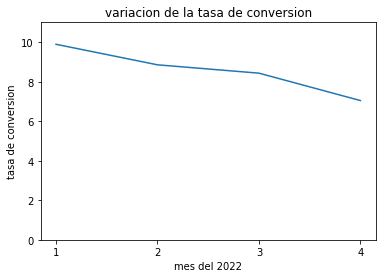

In [40]:
tasa_de_conversion.porcentaje_de_reservas.plot.line( ylim = [0, 11])
plt.title('variacion de la tasa de conversion')
plt.xlabel('mes del 2022')
plt.ylabel('tasa de conversion')
plt.xticks([1,2,3,4])
plt.show()

## Relacion entre tiempo de pantalla y reserva

In [41]:
tiempo_en_pantalla= web.groupby('user_id').agg(tiempo_total=('muinutes on screen','sum'),
                           reserva=('reserved','sum'))

el dataframe tiempo en pantalla  esta agrupado por usuario

In [42]:
tiempo_en_pantalla

,tiempo_total,reserva
user_id,,
104,26.866667,0.0
136,90.316667,1.0
137,37.000000,0.0
166,122.850000,0.0
201,4.483333,0.0
...,...,...
9756022,3.283333,0.0
9759725,59068.466667,0.0
9776787,1.433333,0.0


Quiero ver si el tiempo en que un usuario esta navegando en el sitio web, tiene una correlación positiva con la tasa de reserva o no.

In [43]:
def convirtio(x):
    if x > 0:
        return 1
    else:
        return 0
tiempo_en_pantalla['conversion']=tiempo_en_pantalla['reserva'].apply(convirtio)

In [44]:
tiempo_en_pantalla

,tiempo_total,reserva,conversion
user_id,,,
104,26.866667,0.0,0
136,90.316667,1.0,1
137,37.000000,0.0,0
166,122.850000,0.0,0
201,4.483333,0.0,0
...,...,...,...
9756022,3.283333,0.0,0
9759725,59068.466667,0.0,0
9776787,1.433333,0.0,0


<AxesSubplot:xlabel='tiempo_total', ylabel='reserva'>

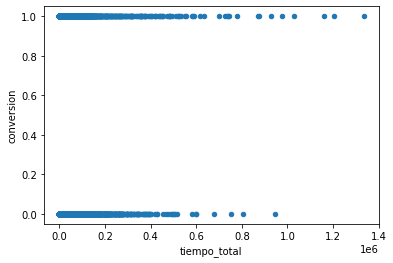

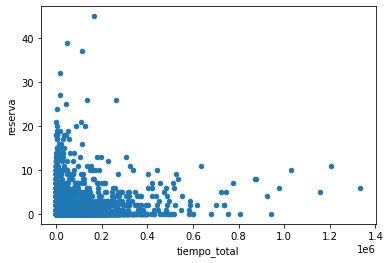

In [45]:
tiempo_en_pantalla.plot.scatter(x='tiempo_total',y='conversion')
tiempo_en_pantalla.plot.scatter(x='tiempo_total',y='reserva')

# Outliers

In [46]:
web.describe()

,user_id,total_events,total_vipphoto_selected,total_vip360view_selected,total_catalogfilter_selected,total_vip_viewed,total_cataloglist_viewed,total_home_viewed,total_year_selected,total_make_selected,...,total_mileage_selected,total_location_selected,total_color_selected,seconds on screen,total_sessions_prev,reserved,avg seconds on screen,mes_sesion,muinutes on screen,avg minutes on screen
count,2.141600e+05,214160.00000,214160.000000,214160.000000,214160.000000,214160.000000,214160.000000,214160.000000,214160.000000,214160.000000,...,214160.000000,214160.000000,214160.000000,2.141600e+05,214160.000000,214160.00000,2.141600e+05,214160.000000,214160.000000,214160.000000
mean,7.249611e+06,136.05466,5.022619,0.549743,28.677615,25.250299,35.365283,4.779613,0.372913,0.376718,...,0.299220,0.262229,0.247086,8.518372e+04,6.660035,0.08481,9.131869e+03,2.583293,1419.728721,152.197821
std,2.521737e+06,406.15579,49.460406,5.033431,122.384672,81.485442,177.395937,22.261192,1.913053,1.884517,...,1.599664,1.538530,1.416469,6.172415e+05,14.556284,0.27860,9.233204e+04,1.011563,10287.358813,1538.867351
min,1.040000e+02,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000e+00,1.000000,0.00000,0.000000e+00,1.000000,0.000000,0.000000
25%,5.262605e+06,12.00000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.920000e+02,2.000000,0.00000,7.350000e+01,2.000000,3.200000,1.225000
50%,8.741507e+06,36.00000,0.000000,0.000000,2.000000,5.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,9.140000e+02,3.000000,0.00000,2.530000e+02,3.000000,15.233333,4.216667
75%,9.240933e+06,115.00000,0.000000,0.000000,18.000000,20.000000,14.000000,3.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,3.426000e+03,6.000000,0.00000,6.207297e+02,3.000000,57.100000,10.345494
max,9.856417e+06,39953.00000,8286.000000,694.000000,11739.000000,6743.000000,21358.000000,2546.000000,320.000000,226.000000,...,211.000000,207.000000,213.000000,1.837662e+07,1361.000000,1.00000,5.648626e+06,4.000000,306276.933333,94143.758333


Se puede ver que hay una gran diferencia entre el cuartil 3 y el cuartil 4. Se puede pensar que los valores altos son errores del sistema o bots.Por lo tanto, voy a crear un dataframe filtado que no contenga outliers irreales.
Al haber una gran cantidad de columnas que necesitan un analisis de outliers , voy a crear una sección para cada una y analizarla antes y despues del filtrado de outlier.


In [47]:
from functions import valor_atipico

Tenía la idea de usar esta formula de valor outlier pero como hay muchos eventos cuyo tercer quartil es 0, voy a analizar todos los eventos juntos y aparte del resto de las variables

## Eventos

In [48]:
eventos=['total_cataloglist_viewed','total_catalogfilter_selected','total_home_viewed','total_vip360view_selected','total_color_selected','total_location_selected','total_make_selected','total_mileage_selected','total_version_selected','total_vip_viewed','total_vipphoto_selected','total_year_selected','total_model_selected']


In [49]:
eventos_estadisticas=web[[*eventos]].describe()
eventos_estadisticas

,total_cataloglist_viewed,total_catalogfilter_selected,total_home_viewed,total_vip360view_selected,total_color_selected,total_location_selected,total_make_selected,total_mileage_selected,total_version_selected,total_vip_viewed,total_vipphoto_selected,total_year_selected,total_model_selected
count,214160.000000,214160.000000,214160.000000,214160.000000,214160.000000,214160.000000,214160.000000,214160.000000,214160.000000,214160.000000,214160.000000,214160.000000,214160.000000
mean,35.365283,28.677615,4.779613,0.549743,0.247086,0.262229,0.376718,0.299220,0.324351,25.250299,5.022619,0.372913,0.339470
std,177.395937,122.384672,22.261192,5.033431,1.416469,1.538530,1.884517,1.599664,1.657433,81.485442,49.460406,1.913053,1.705465
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000
75%,14.000000,18.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,0.000000,0.000000,0.000000
max,21358.000000,11739.000000,2546.000000,694.000000,213.000000,207.000000,226.000000,211.000000,223.000000,6743.000000,8286.000000,320.000000,223.000000


In [50]:
eventos_estadisticas.loc['75%'].max()

20.0

Siendo 20 el valor mas grande de un tercer cuartil , voy a tomarlo como maximo para todos los eventos.Aquellos eventos que superen 20 interacciones no van a ser tomados en cuenta para el modelo.

In [51]:
for i in eventos:
   web=web.loc[web[i] <=20]


los eventos tienen como valor maximo 20

In [52]:
web.describe()

,user_id,total_events,total_vipphoto_selected,total_vip360view_selected,total_catalogfilter_selected,total_vip_viewed,total_cataloglist_viewed,total_home_viewed,total_year_selected,total_make_selected,...,total_mileage_selected,total_location_selected,total_color_selected,seconds on screen,total_sessions_prev,reserved,avg seconds on screen,mes_sesion,muinutes on screen,avg minutes on screen
count,1.335920e+05,133592.000000,133592.000000,133592.000000,133592.000000,133592.000000,133592.000000,133592.000000,133592.000000,133592.000000,...,133592.000000,133592.000000,133592.000000,1.335920e+05,133592.000000,133592.000000,1.335920e+05,133592.000000,133592.000000,133592.000000
mean,7.383556e+06,24.294703,0.217992,0.105283,1.996684,3.755494,1.874192,0.803416,0.213067,0.210589,...,0.164606,0.135046,0.141161,2.052985e+04,3.190550,0.061920,4.947781e+03,2.470769,342.164111,82.463011
std,2.455781e+06,30.091997,1.563175,0.520052,3.807985,4.633768,4.294831,1.865288,0.770356,0.798559,...,0.654614,0.595202,0.594002,2.803831e+05,3.076556,0.241011,7.720861e+04,1.027195,4673.052181,1286.810215
min,1.360000e+02,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000e+00,1.000000,0.000000,0.000000e+00,1.000000,0.000000,0.000000
25%,5.424992e+06,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,7.000000e+01,2.000000,0.000000,3.000000e+01,2.000000,1.166667,0.500000
50%,8.793162e+06,16.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,3.210000e+02,2.000000,0.000000,1.169583e+02,2.000000,5.350000,1.949306
75%,9.247061e+06,32.000000,0.000000,0.000000,2.000000,6.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,9.580000e+02,3.000000,0.000000,2.985000e+02,3.000000,15.966667,4.975000
max,9.856417e+06,832.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,...,20.000000,18.000000,20.000000,1.129725e+07,68.000000,1.000000,5.648626e+06,4.000000,188287.516667,94143.758333


Ahora, analizo las variables que no son eventos por separado

## Total Events

<AxesSubplot:ylabel='total_events'>

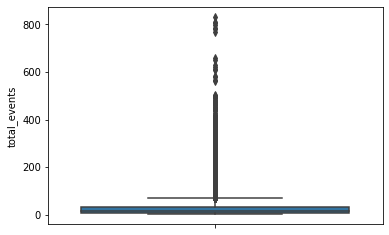

In [53]:
sns.boxplot(data = web, y = 'total_events')

In [54]:
web.total_events.value_counts()

2      10247
4       8089
1       5242
6       5133
8       4969
       ...  
302        1
628        1
444        1
400        1
564        1
Name: total_events, Length: 401, dtype: int64

In [55]:
web= web.loc[web.total_events<valor_atipico(web,'total_events')]

 calcule el valor atípico de total_events y filtre el dataset

In [56]:
web.total_events.describe()

count    126149.000000
mean         19.098629
std          16.304413
min           1.000000
25%           6.000000
50%          14.000000
75%          28.000000
max          70.000000
Name: total_events, dtype: float64

## Seconds on screen


<AxesSubplot:ylabel='seconds on screen'>

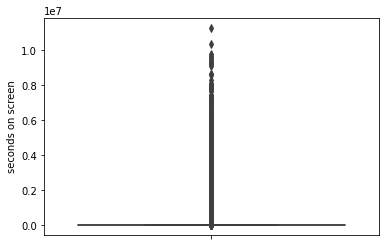

In [57]:
sns.boxplot(data=web,y='seconds on screen')

In [58]:
web['seconds on screen'].value_counts()

0.0        13133
1.0         3205
2.0         1456
3.0         1195
4.0          527
           ...  
3518.0         1
15625.0        1
4626.0         1
5285.0         1
6981.0         1
Name: seconds on screen, Length: 6456, dtype: int64

In [59]:
web=web.loc[web['seconds on screen']<valor_atipico(web,'seconds on screen')]

In [60]:
web['seconds on screen'].describe().round()

count    115160.0
mean        407.0
std         463.0
min           0.0
25%          47.0
50%         232.0
75%         614.0
max        1932.0
Name: seconds on screen, dtype: float64

minutes on screen deriva de seconds on screen por lo que se ajusta aca tambien

## Average seconds on screen

<AxesSubplot:ylabel='avg seconds on screen'>

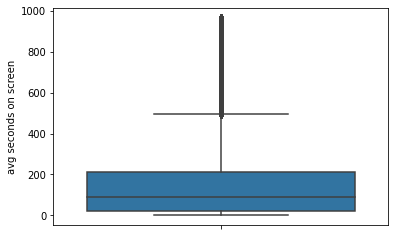

In [61]:
sns.boxplot(data=web,y='avg seconds on screen')

In [62]:
web['avg seconds on screen'].value_counts()

0.000000      13133
0.500000       3205
1.000000       1224
1.500000       1056
2.000000        491
              ...  
50.636364         1
10.625000         1
45.625000         1
129.300000        1
838.000000        1
Name: avg seconds on screen, Length: 7410, dtype: int64

In [63]:
web=web.loc[web['avg seconds on screen'] <valor_atipico(web,'avg seconds on screen')]

In [64]:
web['avg seconds on screen'].describe()

count    108832.000000
mean        117.523420
std         120.367540
min           0.000000
25%          17.500000
50%          79.500000
75%         182.333333
max         492.666667
Name: avg seconds on screen, dtype: float64

Lo mismo sucede con avg minutes on screen, que depende de avg seconds on screen

## Total sessions Prev

<AxesSubplot:ylabel='total_sessions_prev'>

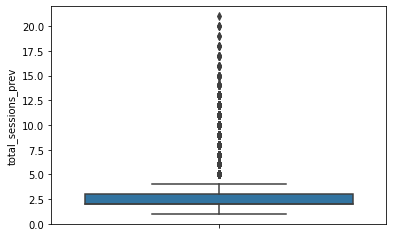

In [65]:
sns.boxplot(data=web,y='total_sessions_prev')

In [66]:
web=web.loc[web.total_sessions_prev<valor_atipico(web,'total_sessions_prev')]

In [67]:
web.total_sessions_prev.describe()

count    88899.000000
mean         2.093184
std          0.616412
min          1.000000
25%          2.000000
50%          2.000000
75%          2.000000
max          3.000000
Name: total_sessions_prev, dtype: float64

In [68]:
print(f"Para el modelo, no se tendrán en cuenta {214160-len(web)} datos atípicos")

Para el modelo, no se tendrán en cuenta 125261 datos atípicos


# Escalado


In [69]:
from functions import data_dist

La funcion data_dist crea un grafico de bigotes y uno de distribucíon para er que escalado hay que usar para cada variable.

El escalado va a transformar los valores para que todos tengan un mismo valor medio y una misma desviación media para poder compararlas

## Total Events

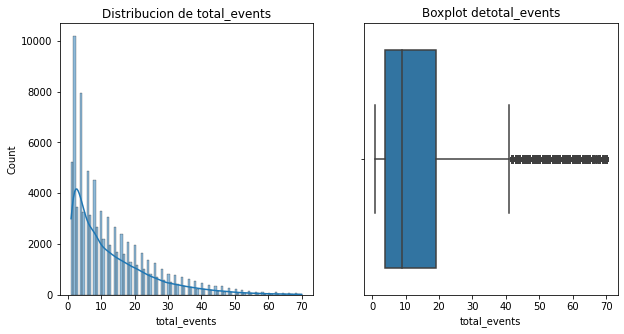

In [70]:
data_dist(web,'total_events')

Al ser una distribucion no normal, aplico minmax scaler

In [71]:
from sklearn.preprocessing import MinMaxScaler
minmaxscaler = MinMaxScaler()
web['total_events']= minmaxscaler.fit_transform(web[['total_events']])


  ##  total Vipp Photo selected

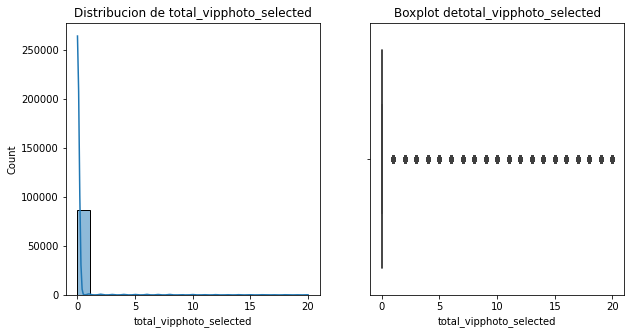

In [72]:
data_dist(web,'total_vipphoto_selected')

Al ser una distribucion no normal, aplico minmax scaler


In [73]:
from sklearn.preprocessing import MinMaxScaler
minmaxscaler = MinMaxScaler()
web['total_vipphoto_selected']= minmaxscaler.fit_transform(web[['total_vipphoto_selected']])

## total vip360 view selected

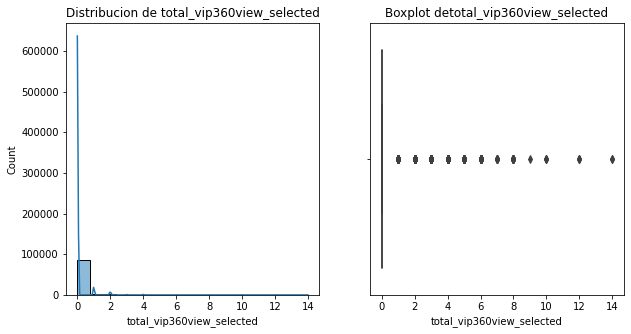

In [74]:
data_dist(web,'total_vip360view_selected')

al ser una distribución no normal, aplico minmax scaler


In [75]:
from sklearn.preprocessing import MinMaxScaler
minmaxscaler = MinMaxScaler()
web['total_vip360view_selected']= minmaxscaler.fit_transform(web[['total_vip360view_selected']])


## total cataloglist viewed

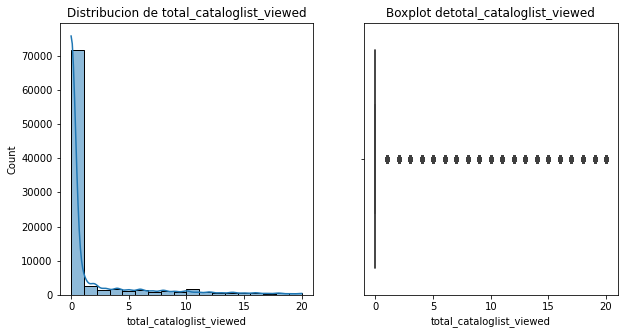

In [76]:
data_dist(web,'total_cataloglist_viewed')

al ser una distribución no normal, aplico minmax scaler

In [77]:
from sklearn.preprocessing import MinMaxScaler
minmaxscaler = MinMaxScaler()
web['total_cataloglist_viewed']= minmaxscaler.fit_transform(web[['total_cataloglist_viewed']])

## total catalogfilter selected

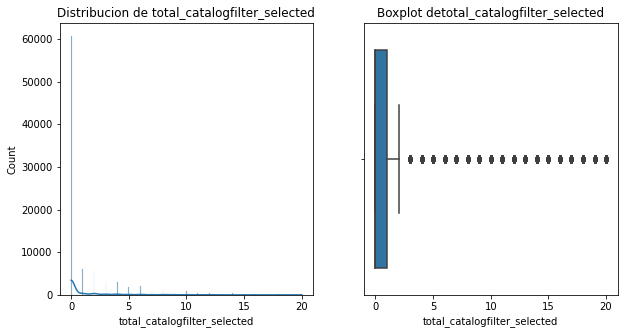

In [78]:
data_dist(web,'total_catalogfilter_selected')

al ser una distribución  no normal, aplico min max Scaler

In [79]:
from sklearn.preprocessing import MinMaxScaler
minmaxscaler = MinMaxScaler()
web['total_catalogfilter_selected']= minmaxscaler.fit_transform(web[['total_catalogfilter_selected']])

## total home viewed

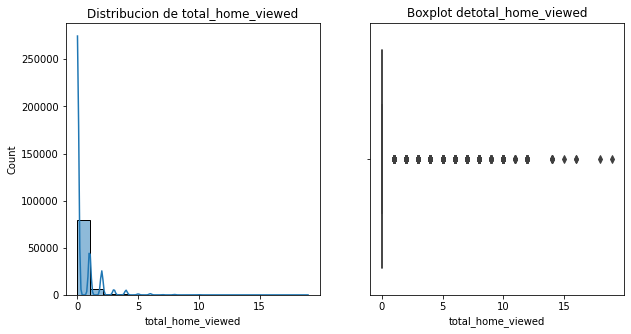

In [80]:
data_dist(web,'total_home_viewed')

Al ser una distribución que se aleja de una normal, uso minmax Scaler

In [81]:
from sklearn.preprocessing import MinMaxScaler
minmaxscaler = MinMaxScaler()
web['total_home_viewed']= minmaxscaler.fit_transform(web[['total_home_viewed']])

## total color selected

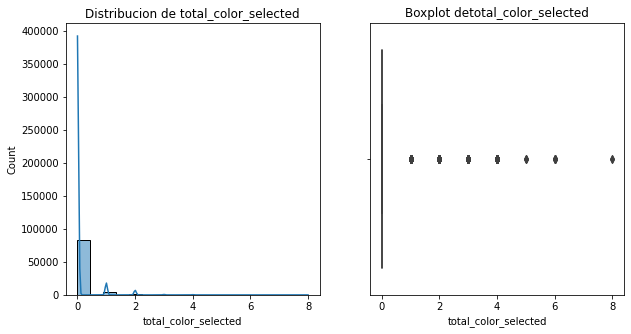

In [82]:
data_dist(web,'total_color_selected')

Al ser una distribución que se aleja de una normal, uso minmax Scaler

In [83]:
from sklearn.preprocessing import MinMaxScaler
minmaxscaler = MinMaxScaler()
web['total_color_selected']= minmaxscaler.fit_transform(web[['total_vipphoto_selected']])

 ## total location selected

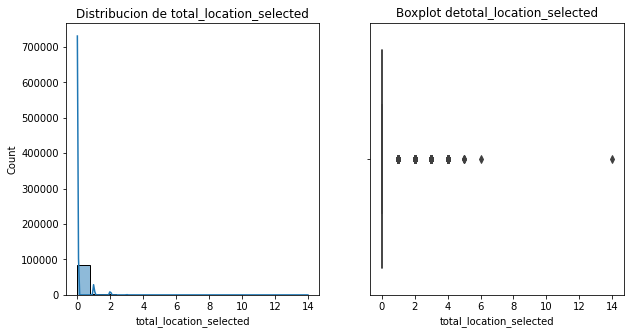

In [84]:
data_dist(web,'total_location_selected')

como es una distribución que se aleja de una normal , uso minmax scaler

In [85]:
from sklearn.preprocessing import MinMaxScaler
minmaxscaler = MinMaxScaler()
web['total_location_selected']= minmaxscaler.fit_transform(web[['total_location_selected']])

## total make selected

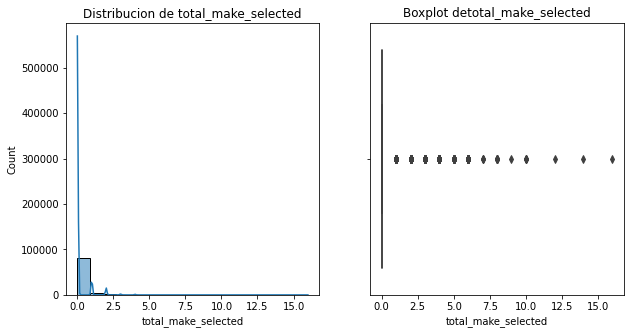

In [86]:
data_dist(web,'total_make_selected')

como es una distribucion que se aleja de una normal, uso minmax scaler

In [87]:
from sklearn.preprocessing import MinMaxScaler
minmaxscaler = MinMaxScaler()
web['total_make_selected']= minmaxscaler.fit_transform(web[['total_make_selected']])

## total mileage selected

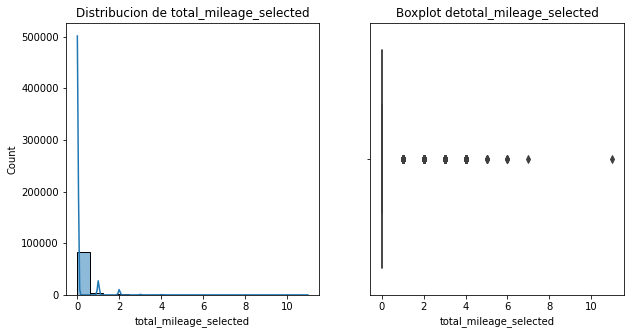

In [88]:
data_dist(web,'total_mileage_selected')

Al ser una distribución que se aleja de una normal, uso minmax scaler

In [89]:
from sklearn.preprocessing import MinMaxScaler
minmaxscaler = MinMaxScaler()
web['total_mileage_selected']= minmaxscaler.fit_transform(web[['total_mileage_selected']])

## total version selected

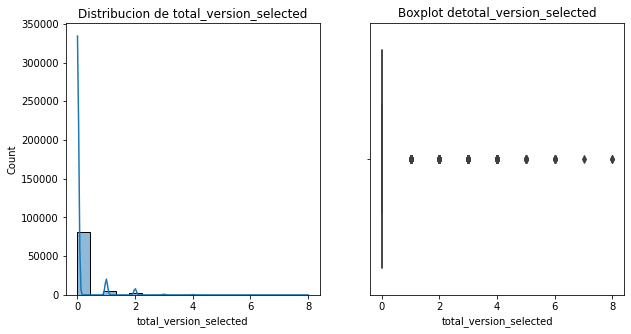

In [90]:
data_dist(web,'total_version_selected')

Al ser una distribución no normal, uso minmax scaler

In [91]:
from sklearn.preprocessing import MinMaxScaler
minmaxscaler = MinMaxScaler()
web['total_version_selected']= minmaxscaler.fit_transform(web[['total_version_selected']])

## total vip viewed

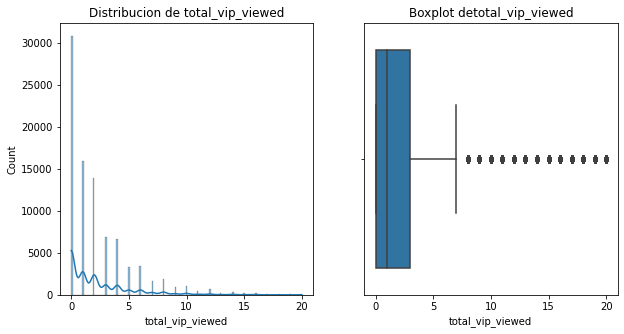

In [92]:
data_dist(web,'total_vip_viewed')

al ser una distribución que se aleja de una normal, uso minmaxscaler

In [93]:
from sklearn.preprocessing import MinMaxScaler
minmaxscaler = MinMaxScaler()
web['total_vip_viewed']= minmaxscaler.fit_transform(web[['total_vip_viewed']])

## total year selected

In [ ]:
data_dist(web,'total_year_selected')

al ser una distribución que se aleja de una normal, uso minmaxscaler

In [ ]:
from sklearn.preprocessing import MinMaxScaler
minmaxscaler = MinMaxScaler()
web['total_year_selected']= minmaxscaler.fit_transform(web[['total_year_selected']])

## total model selected

In [ ]:
data_dist(web,'total_model_selected')

Al ser una distribución no normal,uso minmax scaler

In [ ]:
from sklearn.preprocessing import MinMaxScaler
minmaxscaler = MinMaxScaler()
web['total_model_selected']= minmaxscaler.fit_transform(web[['total_model_selected']])

## Seconds on Screen

In [ ]:
data_dist(web,'seconds on screen')

In [ ]:
from sklearn.preprocessing import MinMaxScaler
minmaxscaler = MinMaxScaler()
web['seconds on screen']= minmaxscaler.fit_transform(web[['seconds on screen']])

In [ ]:
from sklearn.preprocessing import MinMaxScaler
minmaxscaler = MinMaxScaler()
web['muinutes on screen']= minmaxscaler.fit_transform(web[['muinutes on screen']])

## average seconds and minutes on screen

In [ ]:
data_dist(web,'avg seconds on screen')

In [ ]:
from sklearn.preprocessing import MinMaxScaler
minmaxscaler = MinMaxScaler()
web['avg seconds on screen']= minmaxscaler.fit_transform(web[['avg minutes on screen']])

In [ ]:
from sklearn.preprocessing import MinMaxScaler
minmaxscaler = MinMaxScaler()
web['avg minutes on screen']= minmaxscaler.fit_transform(web[['avg minutes on screen']])

## total sessions prev

In [ ]:
data_dist(web,'total_sessions_prev')

al ser una distribucíon que se aleja de la normal, uso minmax scaler

In [ ]:
from sklearn.preprocessing import MinMaxScaler
minmaxscaler = MinMaxScaler()
web['total_sessions_prev']= minmaxscaler.fit_transform(web[['total_sessions_prev']])

In [ ]:
web.describe()

# Encoding

Las variables categoticas  necesitan un encoding para que el modelo las pueda interpretar.Cada valor de la variable categotica sera una columna nueva y  en la fila sera 1 si coincide  y 0 en caso contrario

## region

Para región se hará un onehot encoder   conservando el region_ antes delvalor para recordar que previene de la columna region

In [ ]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse=False)
ohe.fit(web[['region']])
display(ohe.categories_)
display(ohe.get_feature_names_out())
region_encoded = ohe.transform(web[['region']])

web[ohe.get_feature_names_out()] = region_encoded


web.drop(columns='region', inplace = True)
web

## Device Model

con deviece model sucede lo mismo que con región

In [ ]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse=False)
ohe.fit(web[['device_model']])
display(ohe.categories_)
display(ohe.get_feature_names_out())
device_encoded = ohe.transform(web[['device_model']])

web[ohe.get_feature_names_out()] = device_encoded


web.drop(columns='device_model', inplace = True)
web

# Modelo

El  modelo  va ser una regresión logística (clasificación) porque  se  va a buscar predecir  de una variable categórica

In [ ]:
web.reserved.value_counts()/len(web)*100

La hipotesis nula es que el 95,4% no reservarn
El modelo tiene que spuerar este valor para pooder considerarse un buen modelo.
Si ,por ejemplo, el accuracy es de 90%, por mas que sea un valor alto, un modelo que diga que todas no reservó va a tener un accuracy mas alto que este modelo.

## División de variables

In [ ]:
X = web.drop(columns=['user_id','device_id','reserved','session_date','city'])
y = web['reserved']

La variable dependiente  es **reserved**
Las variables independientes son el resto del dataset  excluyendo:
    -**User_id**
    -**device_id**
    -**session_date**
    -**City**

## Train test

El train test split va a dividir los datos en dos grupos, uno para que el modelo entrene, y otro para probar su rendiemiento. Como no hay información nueva, se corta parte del dataset (un 30 %) para probar las predicciones del modelo.
La división es random.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10,stratify = y)

## Regresión Logistica

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
scores = cross_val_score(model, X, y, cv=10)
accuracy= scores.mean()

print(f"El accuracy de este modelo es de {accuracy}")

El accuracy del modelo es igual a la hipotesis nula. Podríamos ver si el modelo predice que todas son 0 como lo es la hipotesis nula

## Matriz de confusión

In [ ]:
from sklearn import metrics

score = model.score(X_test, y_test)
cm = metrics.confusion_matrix(y_test, y_pred)

all_sample_title = 'Accuracy Score: {0}'.format(score.round(2))
plt.title(all_sample_title, size=15)
df_cm = pd.DataFrame( data= cm ,index = ['Real Negative: 0', 'Real Positive: 1'],
                  columns = ['Predict Negative: 0', 'Predict Positive: 1'])
matrix=sns.heatmap(df_cm, annot=True, fmt=".3f", linewidths=.5, square=True, cmap='PiYG')
plt.figure(figsize=(9, 9))
plt.show()

como se ve en la matriz, el modelo nunca predijo 1. El True positives , es decir los que el modelo predice como 1 y son 1 es 0 y el false positive, los que el modeko predice como 1 y son 0 es 0.
Es decir, este es un modelo que a todo lo predice como 0.
Por lo tanto, el recall y el precision deberian ser 0

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix

print(f'Recall : {recall_score(y_test, y_pred)}')
print(f'Precision: {precision_score(y_test, y_pred)}')

Si pruebo predecir con un set de datos nuevos, me va a devolver 0.

Voy a ver cuanto cambia el accuracy si saco las columnas de events pero dejo la de total events

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
X = web.drop(columns=['user_id','device_id','reserved','session_date','city','total_cataloglist_viewed','total_catalogfilter_selected','total_home_viewed','total_vip360view_selected','total_color_selected','total_location_selected','total_make_selected','total_mileage_selected','total_version_selected','total_vip_viewed','total_vipphoto_selected','total_year_selected','total_model_selected','avg seconds on screen','avg minutes on screen'])
y = web['reserved']
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
scores = cross_val_score(model, X, y, cv=10)
accuracy= scores.mean()
print(f"el nuevo accuracy es {accuracy}")

El accuracy aumento muy poco pero puede ser una indicación de que la selección de variables es importante

# Conclusión

In [ ]:
def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(14, 12))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)

    _ = sns.heatmap(
        df.corr(),
        cmap = colormap,
        square=True,
        cbar_kws={'shrink':.9 },
        ax=ax,
        annot=True,
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 }
    )

    plt.title(' KAVAK', y=1.05, size=15)

correlation_heatmap(web)

El modelo no predice si un usuario va a reservar un auto. Este modelo, no  funcióna ya que predice que todos los negativos

El mapa de correlació muestra que no hay variables con relación fuerte a la variable dependiente lo cual puede ser una razon por la que el modelo no funciona. Tambien , al tener solo un 4,5% de registros que corresponden a usuarios que reservan , puede ser que el modelo no tenga sufieciente información para aprender sobre las caracteristicas de un usuario que reserva